In [1]:
from synxflow import flood
from synxflow import IO

from synxflow.IO.demo_functions import demo_input

c:\Users\Gustavo\miniforge3\envs\synxflow-env\lib\site-packages\synxflow\IO\Boundary.py:272: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_table.name[0] = 'Outline boundary'
c:\Users\Gustavo\miniforge3\envs\synxflow-env\lib\site-package

Flow series on boundary 1 is converted to velocities
Theta = 135.00degree
---------------------- Model information ---------------------
case_folder : c:\Users\Gustavo\code\curioS\use_cases\Flooding
birthday : 2025-03-28 13:27
num_GPU : 1
run_time : [[0, 3600, 3600, 3600], 's']
num_gauges : 2
---------------------- Grid information ----------------------
area : [np.float64(4351200.0), 'm^2']
shape : (269, 269)
cellsize : [10.0, 'm']
num_cells : 43512
extent : {'left': 0.0, 'right': 2690.0, 'bottom': 0.0, 'top': 2690.0}
---------------------- Initial condition ---------------------
h0 : Wet ratio: 0.00%
hU0x : Wet ratio: 0.00%
hU0y : Wet ratio: 0.00%
---------------------- Boundary condition --------------------
num_boundary : 3
boundary_details : ['0. (outline) fall, h and hU fixed as zero, number of cells: 788', '1. open, hU given, number of cells: 2', '2. open, h given, number of cells: 46']
---------------------- Rainfall ------------------------------
num_source : 1
max : [np.float

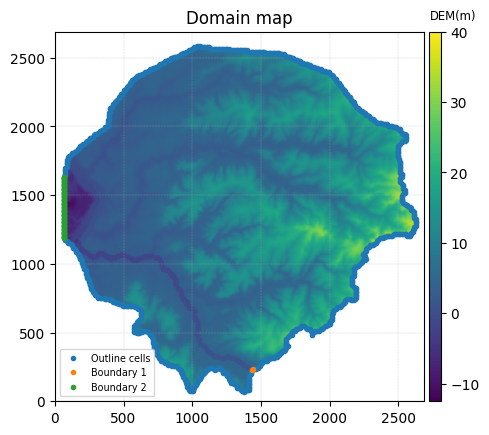

In [2]:
obj_in = demo_input() # create input object # <class 'synxflow.IO.InputModel.InputModel'>
obj_in.write_input_files() # create all input files 

In [ ]:
# flood.run(obj_in.get_case_folder())

In [3]:
from synxflow import IO
import os
from synxflow.IO.demo_functions import get_sample_data
dem_file, demo_data, data_path = get_sample_data() # get the path of sample data

os.listdir(data_path)

['DEM.gz', 'landcover.gz', 'rain_mask.gz', 'rain_source.csv']

(<Figure size 640x480 with 2 Axes>, <Axes: >)

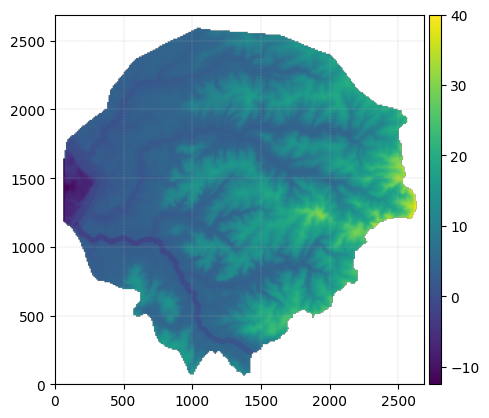

In [4]:
DEM = IO.Raster(os.path.join(data_path,'DEM.gz')) # load the file into a Raster object
DEM.mapshow() # plot the Raster object

(<Figure size 640x480 with 2 Axes>, <Axes: >)

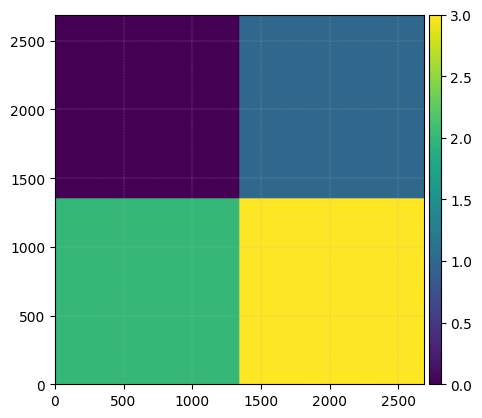

In [5]:
rain_mask = IO.Raster(os.path.join(data_path,'rain_mask.gz'))
rain_mask.mapshow()

In [6]:
import pandas as pd
print(os.path.join(data_path,'rain_source.csv'))
rain_source = pd.read_csv(os.path.join(data_path,'rain_source.csv'), header = None)
rain_source.head()


c:\Users\Gustavo\miniforge3\envs\synxflow-env\lib\site-packages\synxflow\IO\sample\flood\rain_source.csv


,0,1,2,3,4
0,0,0,0.000014,0,0.000001
1,360,0,0.000014,0,0.000001
2,720,0,0.000014,0,0.000001
3,1080,0,0.000014,0,0.000001
4,1440,0,0.000014,0,0.000001


(<Figure size 640x480 with 2 Axes>, <Axes: >)

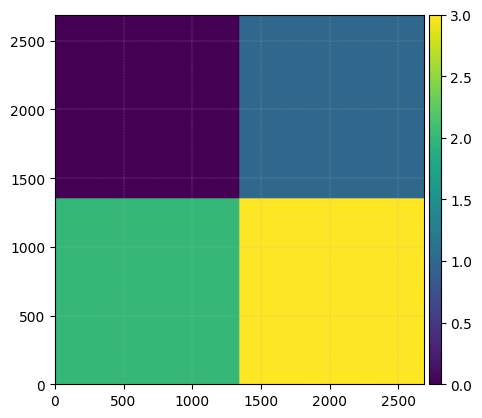

In [7]:
landcover = IO.Raster(os.path.join(data_path,'landcover.gz'))
landcover.mapshow()

In [ ]:
ngpus = 1
case_folder = os.path.join(os.getcwd(), 'flood_case') # define a case folder in the current directory
case_input = IO.InputModel(DEM, num_of_sections=ngpus, case_folder=case_folder)

<class 'synxflow.IO.InputModel.InputModel'>


c:\Users\Gustavo\miniforge3\envs\synxflow-env\lib\site-packages\synxflow\IO\Boundary.py:272: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_table.name[0] = 'Outline boundary'
c:\Users\Gustavo\miniforge3\envs\synxflow-env\lib\site-package

In [9]:
case_input.set_initial_condition('h0', 0.0)

In [11]:
import numpy as np
box_upstream = np.array([[1427, 195],  # bottom left
                         [1446, 243]]) # upper right
box_downstream = np.array([[58, 1645], # upper left
                           [72, 1170]]) # bottom right
discharge_values = np.array([[0, 100], # first column: time - s; second colum: discharge - m3/s
                            [3600,100]])

In [12]:
bound_list = [
            {'polyPoints': box_upstream,
             'type': 'open',
             'hU': discharge_values},
            {'polyPoints': box_downstream,
             'type': 'open',
             'h': np.array([[0, 5],
                            [3600,5]])}] # we fix the downstream depth as 12.5 m

Flow series on boundary 1 is converted to velocities
Theta = 135.00degree


c:\Users\Gustavo\miniforge3\envs\synxflow-env\lib\site-packages\synxflow\IO\Boundary.py:272: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_table.name[0] = 'Outline boundary'
c:\Users\Gustavo\miniforge3\envs\synxflow-env\lib\site-package

(<Figure size 640x480 with 2 Axes>, <Axes: title={'center': 'Domain Map'}>)

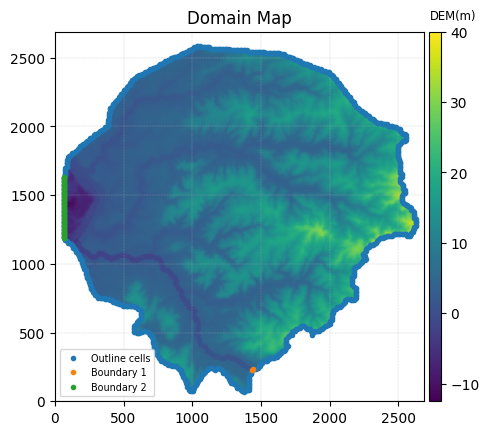

In [13]:
case_input.set_boundary_condition(boundary_list=bound_list)
case_input.domain_show() # show domain map

In [14]:
rain_source_np = rain_source.to_numpy()
case_input.set_rainfall(rain_mask=rain_mask, rain_source=rain_source_np)

In [15]:
case_input.set_landcover(landcover)
case_input.set_grid_parameter(manning={'param_value': [0.035, 0.055],
                                        'land_value': [0, 1],
                                        'default_value':0.035})

In [16]:
case_input.set_gauges_position(np.array([[560, 1030],
                                        [1140,330]]))

In [17]:
case_input.set_runtime([0, 7200, 900, 1800])

'0-start, 7200-end, 900-output interval, 1800-backup interval'

In [18]:
print(case_input)

---------------------- Model information ---------------------
case_folder : c:\Users\Gustavo\code\curioS\use_cases\Flooding\flood_case
birthday : 2025-03-28 13:27
num_GPU : 1
run_time : [0, 7200, 900, 1800]
num_gauges : 2
---------------------- Grid information ----------------------
area : [np.float64(4351200.0), 'm^2']
shape : (269, 269)
cellsize : [10.0, 'm']
num_cells : 43512
extent : {'left': 0.0, 'right': 2690.0, 'bottom': 0.0, 'top': 2690.0}
---------------------- Initial condition ---------------------
h0 : 0.0
hU0x : 0
hU0y : 0
---------------------- Boundary condition --------------------
num_boundary : 3
boundary_details : ['0. (outline) fall, h and hU fixed as zero, number of cells: 788', '1. open, hU given, number of cells: 2', '2. open, h given, number of cells: 46']
---------------------- Rainfall ------------------------------
num_source : 4
max : [np.float64(50.0), 'mm/h']
sum : [np.float64(12.38), 'mm']
average : [np.float64(13.75), 'mm/h']
spatial_res : [np.float64(

In [19]:
case_input.write_input_files()

c:\Users\Gustavo\code\curioS\use_cases\Flooding\flood_case\input\mesh\DEM.txt created
times_setup.dat created
device_setup.dat created
z created
h created
hU created
precipitation created
manning created
sewer_sink created
cumulative_depth created
hydraulic_conductivity created
capillary_head created
water_content_diff created
precipitation_mask created
precipitation_source_all.dat created
boundary condition files created
gauges_pos.dat created


In [20]:
from synxflow import flood
if ngpus > 1:
    flood.run_mgpus(case_folder)
else:
    flood.run(case_folder)

0.004999999888241291
0.16660837829113007
1.445268988609314
2.0573086738586426
2.6371042728424072
3.169978618621826
3.6662607192993164
4.145103454589844
4.609842777252197
5.071043968200684
5.5199875831604
5.957622528076172
6.385663032531738
6.802867412567139
7.21126651763916
7.610101699829102
8.000718116760254
8.38512134552002
8.76491641998291
9.141414642333984
9.516646385192871
9.892779350280762
10.268040657043457
10.643425941467285
11.019879341125488
11.398062705993652
11.778417587280273
12.161306381225586
12.547082901000977
12.936062812805176
13.327258110046387
13.7182035446167
14.111300468444824
14.50788688659668
14.908843994140625
15.312568664550781
15.719161033630371
16.12913703918457
16.542760848999023
16.960174560546875
17.381460189819336
17.806655883789062
18.23575782775879
18.668725967407227
19.10421371459961
19.541492462158203
19.980575561523438
20.42149543762207
20.86429786682129
21.30904197692871
21.75579833984375
22.204647064208984
22.655672073364258
23.109127044677734
23.

In [21]:
case_output = IO.OutputModel(input_obj = case_input)

In [47]:
gauges_pos, times, values = case_output.read_gauges_file(file_tag = 'h')

print(values.shape)
print(times.shape)

(119, 2)
(119,)


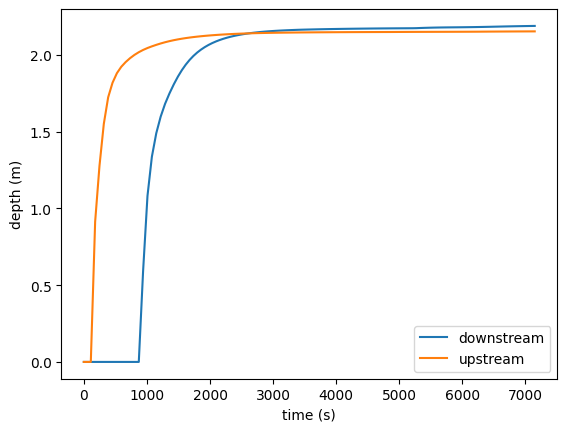

In [23]:
import matplotlib.pyplot as plt
lines = plt.plot(times, values)
plt.xlabel('time (s)')
plt.ylabel('depth (m)')
plt.legend(lines[:2],['downstream','upstream'])
plt.show()

In [ ]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

max_depth = case_output.read_grid_file(file_tag='h_max_7200')

latLng = max_depth.to_points()

print(latLng[0])
print(latLng[1])

xv, yv = max_depth.to_points()  # Get coordinate grids
values = max_depth.array.flatten()  # Flatten raster values
points = [Point(x, y) for x, y in zip(xv.flatten(), yv.flatten())]  # Create Point geometries

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'value': values, 'geometry': points}, crs=f"EPSG:27700")

print(gdf["geometry"])


# gdf.plot(column="value", cmap="plasma", legend=True, markersize=10)
# max_depth.mapshow()

[[   5.   15.   25. ... 2665. 2675. 2685.]
 [   5.   15.   25. ... 2665. 2675. 2685.]
 [   5.   15.   25. ... 2665. 2675. 2685.]
 ...
 [   5.   15.   25. ... 2665. 2675. 2685.]
 [   5.   15.   25. ... 2665. 2675. 2685.]
 [   5.   15.   25. ... 2665. 2675. 2685.]]
[[2685. 2685. 2685. ... 2685. 2685. 2685.]
 [2675. 2675. 2675. ... 2675. 2675. 2675.]
 [2665. 2665. 2665. ... 2665. 2665. 2665.]
 ...
 [  25.   25.   25. ...   25.   25.   25.]
 [  15.   15.   15. ...   15.   15.   15.]
 [   5.    5.    5. ...    5.    5.    5.]]
value        float64
geometry    geometry
dtype: object
